# Goodreads Dataset - Exploratory Data Analysis

In this notebook, our objective is to explore every feature of a dataset that tells us about the ratings information for every book. We do our exploration mostly by data visualization since it's easier to find the conclusion of the data based on visual

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from collections import Counter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreadsbooks/books.csv


# Preview of Data

In [2]:
# Read dataset
df = pd.read_csv('/kaggle/input/goodreadsbooks/books.csv', error_bad_lines=False)
df.head(3)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [3]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


There aren't missing values for each columns. But the num_pages column is weird. Let's fix this

In [4]:
# Remove unnecessary space before num_pages
df.columns = [x.split()[0] for x in df.columns]

In [5]:
# Describe columns with object datatype 
df.describe(include=['O'])

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,27,3679,2290
top,The Brothers Karamazov,P.G. Wodehouse,0452285216,eng,10/1/2005,Vintage
freq,9,40,1,8908,56,318


In [6]:
# Describe columns with numerical datatypes (float and int)
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


There are 11123 data with bookID, isbn and isbn13 as a unique values. Let's remove it since it won't give us anything to explore.

In [7]:
# Drop unnecessary columns
df_new = df.drop(['bookID', 'isbn', 'isbn13'], axis=1)
df_new.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic


# **Data exploration with visualization**

In [8]:
# Import libraries of plots
import matplotlib.pyplot as plt
plt.rc('font', family='TakaoPGothic')
import seaborn as sns
sns.set_style('darkgrid')

In [9]:
# Check the composition of language code

df_new['lan_code2'] = df_new.language_code.apply(lambda x: 'eng' if 'en-' in x or 'eng' in x else x)
lan_code = df_new['lan_code2'].value_counts().reset_index()

# Get Top 5 Languange and Aggregate others into one value called 'other'
sum_others = lan_code[lan_code['lan_code2'] < 46].lan_code2.sum()
lan_code = lan_code[lan_code['lan_code2'] >= 46].append({'index':'others', 'lan_code2': sum_others}\
                                                            , ignore_index=True)

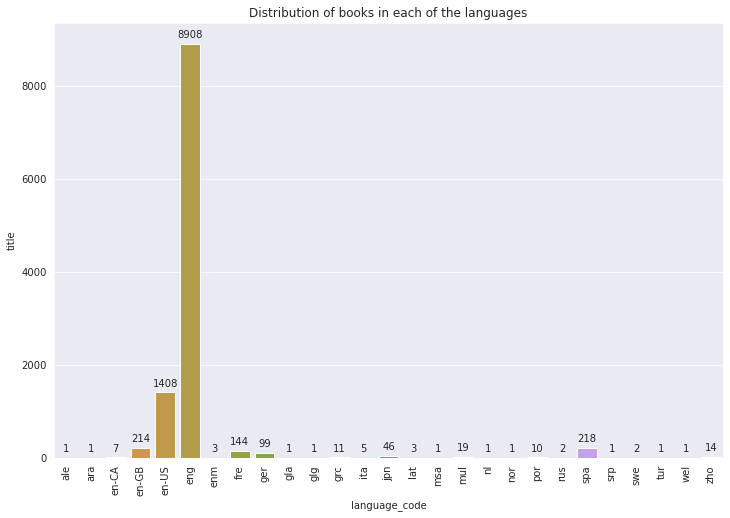

In [10]:
# Distribution of books in each of the languages
fig, ax = plt.subplots(figsize=(12,8))

dt = df_new.groupby('language_code').count()['title'].reset_index()
ax = sns.barplot(data= dt, x='language_code', y='title')
ax.set_title('Distribution of books in each of the languages')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

Most of the books are in english and other form of english such as en-US, en-GB and en-CA. We can say based on above bar plot that mroe than 90% books are in english language.

For further exploration, let's just focus on top 5 of the language and let's consider all english form as one language which we will label it as 'eng' only.

# Univariate Analysis

In this analysis, we focus on see the distribution of every feature.

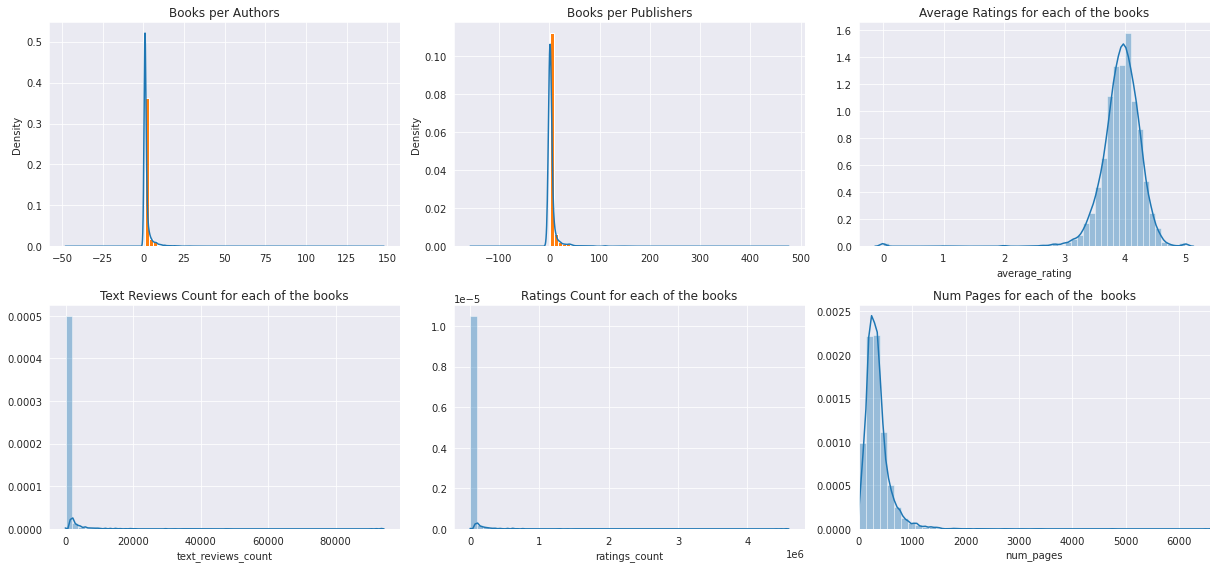

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(17,8))

# Distribution of books per authors
dist_authors = Counter([item for x in df_new['authors'].str.split('/') for item in x]).most_common()
dist_authors = pd.DataFrame(dist_authors).rename(columns={0: 'author', 1: 'freq'})
ax = dist_authors['freq'].plot.kde(ax=axes[0,0], legend=False, title='Books per Authors')
ax = dist_authors['freq'].hist(density=True, bins=40, ax=axes[0,0])
plt.xlim(0,max(dist_authors['freq']))


# # Distribution of books per publishers
dist_publisher = df_new['publisher'].value_counts().reset_index()
ax = dist_publisher['publisher'].plot.kde(ax=axes[0,1], legend=False, title='Books per Publishers')
ax = dist_publisher['publisher'].hist(density=True, bins=40, ax=axes[0,1])
plt.xlim(0,max(dist_publisher['publisher']))

# See the distribution of average_rating
ax = sns.distplot(df_new['average_rating'], ax=axes[0,2])
ax.set_title('Average Ratings for each of the books')

# Distribution of text_review_count per books
ax = sns.distplot(df_new['text_reviews_count'], ax=axes[1,0])
ax.set_title('Text Reviews Count for each of the books')

# Distribution of ratings_count per books
ax = sns.distplot(df_new['ratings_count'], ax=axes[1,1])
ax.set_title('Ratings Count for each of the books')

# See the distribution of num_pages
ax = sns.distplot(df_new['num_pages'], ax=axes[1,2])
ax.set_title('Num Pages for each of the  books')
plt.xlim(0, max(df_new['num_pages']))

plt.tight_layout()

We can see that most of the books has a good average ratings that lies between 3.7 to 4.3 and most of the books has only around 0 to 500 number of pages. For the rest of the plots let's minimize the x-axis limit so we can see a whole details

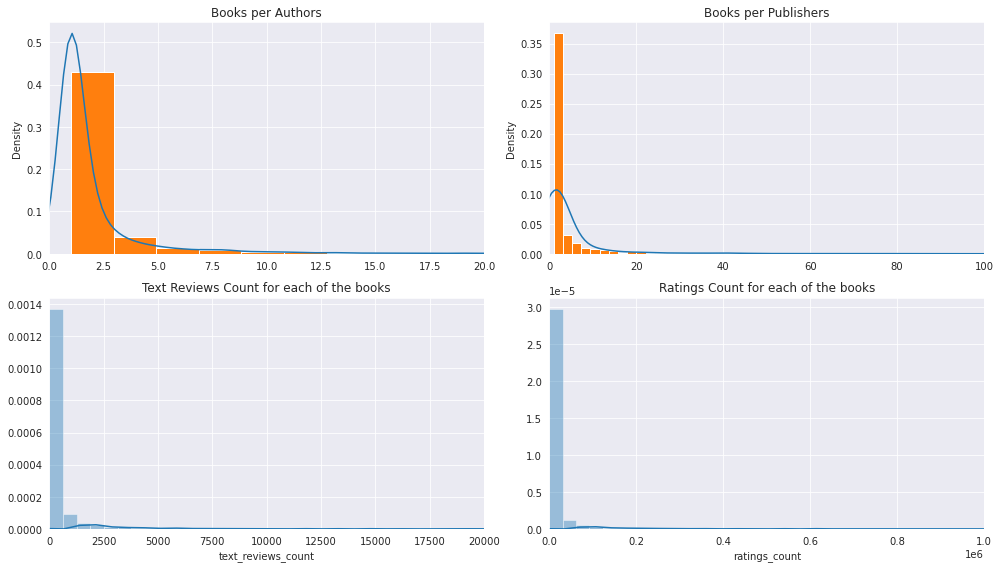

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))

# Distribution of books per authors
ax = dist_authors['freq'].plot.kde(ax=axes[0,0], legend=False, title='Books per Authors')
ax = dist_authors['freq'].hist(density=True, bins=50, ax=axes[0,0])
ax.set_xlim(0, 20)

# # Distribution of books per publishers
ax = dist_publisher['publisher'].plot.kde(ax=axes[0,1], legend=False, title='Books per Publishers')
ax = dist_publisher['publisher'].hist(density=True, bins=150, ax=axes[0,1])
ax.set_xlim(0,100)

# Distribution of text_review_count per books
ax = sns.distplot(df_new['text_reviews_count'], ax=axes[1,0], bins=150)
ax.set_title('Text Reviews Count for each of the books')
ax.set_xlim(0, 20000)

# Distribution of ratings_count per books
ax = sns.distplot(df_new['ratings_count'], ax=axes[1,1], bins=150)
ax.set_title('Ratings Count for each of the books')
ax.set_xlim(0, 1e6)
plt.tight_layout()

So most authors only write one book, same things happens to the publishers although there are a lot of publishers that publish around 20 books while other larger part of authors write around 10 books.

Most Reviews of a book has less than 1000 words and most books has only less than 100000 ratings 

**Let's see the distribution of publish time**

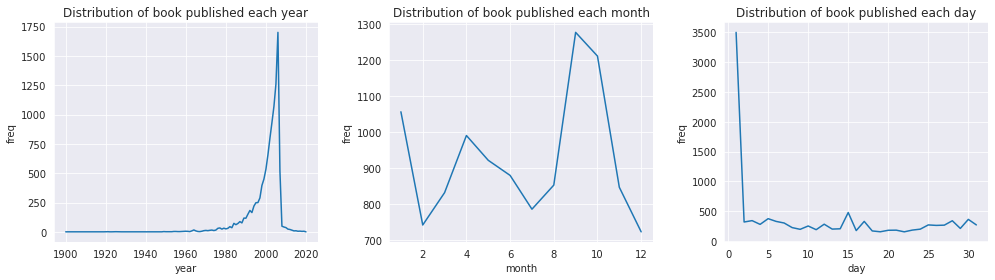

In [13]:
# Create new columns for each days, months and years
df_new['publish_year'] = df_new['publication_date'].str.split('/').apply(lambda x: x[2]).astype(int)
df_new['publish_month'] = df_new['publication_date'].str.split('/').apply(lambda x: x[0]).astype(int)
df_new['publish_day'] = df_new['publication_date'].str.split('/').apply(lambda x: x[1]).astype(int)

fig, axes = plt.subplots(1, 3, figsize=(14,4))
date = ['year', 'month', 'day']
for i, d in enumerate(date):
    pb_time = Counter(df_new['publish_'+d])
    pb_time = pd.DataFrame.from_dict(pb_time, orient='index').reset_index().rename(columns={'index':d, 0:'freq'})
    ax = sns.lineplot(data=pb_time, x=d, y='freq', ax=axes[i])
    ax.set_title('Distribution of book published each '+d)
    
plt.tight_layout()

Most books in this goodreads review is published around 2000-2010. Most books also published in the last quarter of the month which is September followed by April and January while books are less published in December. 

Last, most books is published in the beginning of the month and followed by the middle of the month as the second most.

**Top 10 Books based on the occurence and how many ratings given**

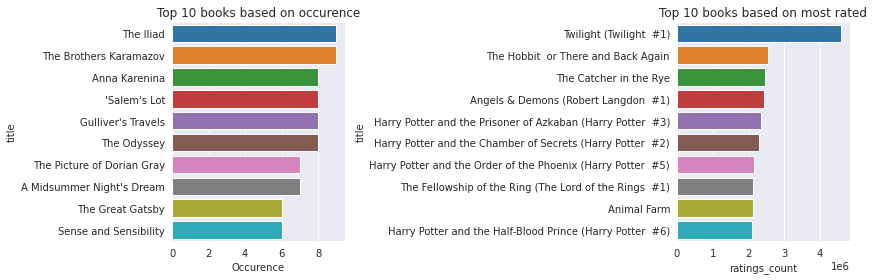

In [14]:
# Top 10 title based on the occurence and most ratings
fig, axes = plt.subplots(1, 2, figsize=(12,4))

dt = df.groupby('title').count()['bookID'].reset_index().sort_values(by='bookID', ascending=False).head(10)
ax = sns.barplot(data=dt, x="bookID", y="title", ax = axes[0])
ax.set(xlabel='Occurence', title='Top 10 books based on occurence')

dt = df_new.groupby('title').sum()['ratings_count'].reset_index().sort_values(by='ratings_count', ascending=False).head(10)
ax = sns.barplot(data=dt, x="ratings_count", y="title", ax = axes[1])
ax.set(xlabel='ratings_count', title='Top 10 books based on most rated')

plt.tight_layout()
plt.show()

**Top 10 Authors based on how many books written and how many ratings given**

In [15]:
# Create a temporary dataframe that only containst ratings count and list of authors
auth_df = df_new[['ratings_count', 'authors', 'lan_code2']]
auth_df['authors'] = auth_df['authors'].str.split('/')

# Get the total of ratings_count for each of the authors
rat_count, lan_list = [], []

for aut in dist_authors['author']:
    is_author = auth_df['authors'].apply(lambda x: True if aut in x else False)
    lang = auth_df[is_author]['lan_code2'].value_counts().reset_index().loc[0,:]['index']
    lan_list.append(lang)
    rat_count.append(sum(list(auth_df[is_author].ratings_count)))

# Create column that contains total ratings count for each of the authors
dist_authors['rat_count'] = rat_count
dist_authors['lan_code'] = lan_list

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


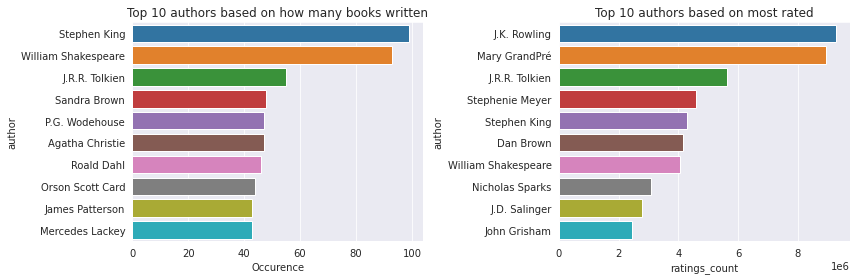

In [16]:
# Top 10 authors based on the occurence and most ratings 
fig, axes = plt.subplots(1, 2, figsize=(12,4))

ax = sns.barplot(data=dist_authors.sort_values(by='freq', ascending=False).head(10), x="freq", y="author", ax = axes[0])
ax.set(xlabel='Occurence', title='Top 10 authors based on how many books written')

ax = sns.barplot(data=dist_authors.sort_values(by='rat_count', ascending=False).head(10), x="rat_count", y="author", ax = axes[1])
ax.set(xlabel='ratings_count', title='Top 10 authors based on most rated')

plt.tight_layout()
plt.show()

Let's take top 3 authors either based on the how many books written or most ratings given. We will analyze the performance of these 3 authors in the later analysis. Let's take Stephen King, J.K. Rowling and J.R.R. Tolkien. 

**Check the Top 10 Title of books of every language**

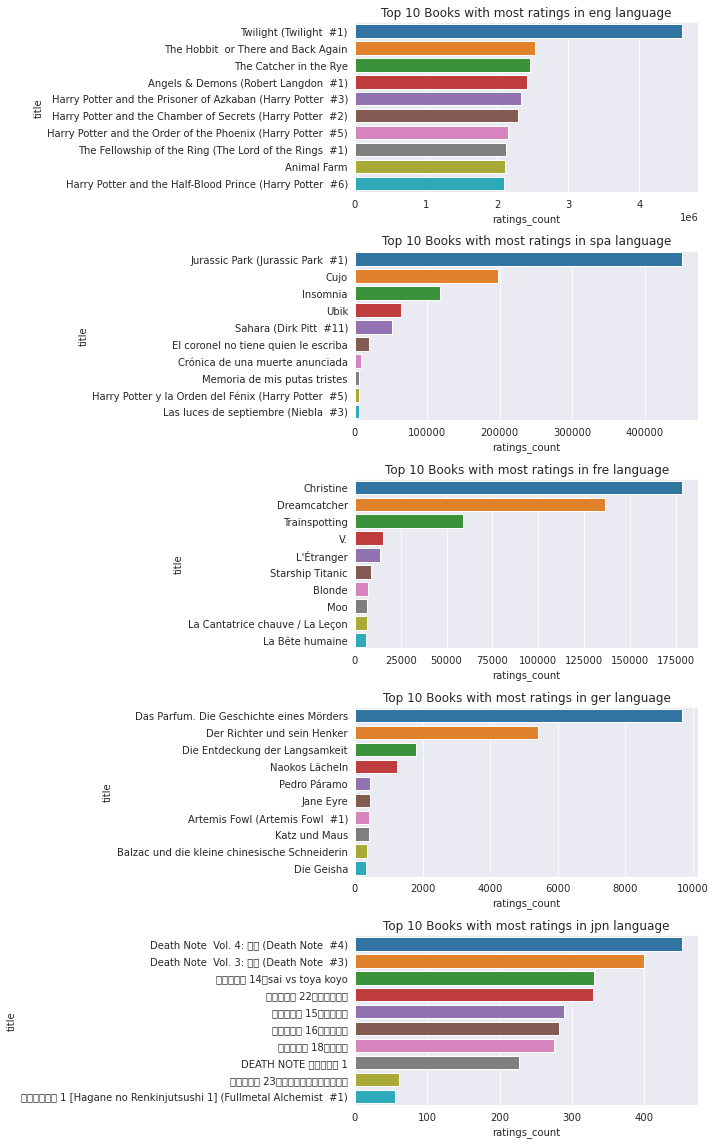

In [17]:
# Hide Warning Message
import warnings
warnings.filterwarnings('ignore')

# Top 10 Books with the most ratings count from top 5 language_code 
top_5_lan = list(lan_code.loc[:4,:]['index'])
fig, axes = plt.subplots(5, 1, figsize=(10,16))

for i, lan in enumerate(top_5_lan):
    dt = df_new[df_new.lan_code2 == lan].sort_values(by='ratings_count', ascending=False).head(10)
    ax = sns.barplot(data=dt, x='ratings_count', y='title', ax=axes[i])
    ax.set_title('Top 10 Books with most ratings in '+lan+' language')
plt.tight_layout()

As you can see from all barplots, books with most ratings in english langauges are mostly Harry Potter books but the first most ratings book is Twilight. In spanish, Jurrasic Park dominates the most ratings,  in french , Christine is the most, in german its Das Parfum which translated into Perfume the story of murderer and last in Japanese mostly are comic books with Death Note franchise dominate the Top 10.

**Top 10 Authors based on every the how many rating given in top 5 languages**

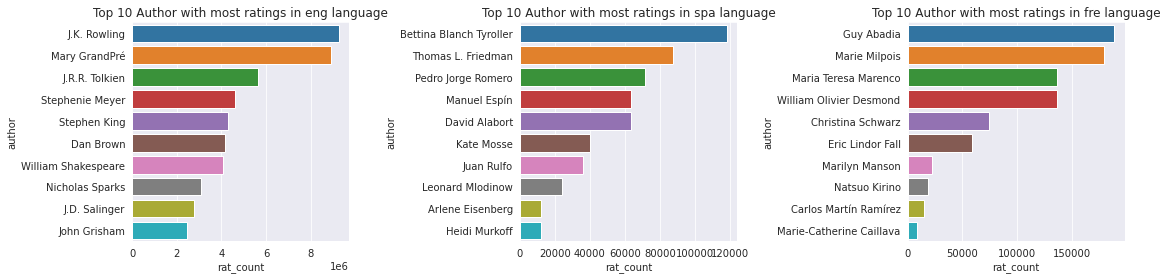

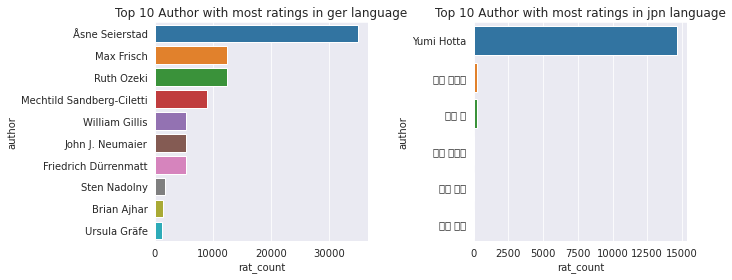

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))

for i, lan in enumerate(top_5_lan[:3]):
    dt = dist_authors[dist_authors['lan_code'] == lan].sort_values(by='rat_count', ascending=False).head(10)
    ax = sns.barplot(data=dt, x='rat_count', y='author', ax=axes[i])
    ax.set_title('Top 10 Author with most ratings in '+lan+' language')

plt.tight_layout()
fig, axes = plt.subplots(1, 2, figsize=(10,4))

for i, lan in enumerate(top_5_lan[3:]):
    dt = dist_authors[dist_authors['lan_code'] == lan].sort_values(by='rat_count', ascending=False).head(10)
    ax = sns.barplot(data=dt, x='rat_count', y='author', ax=axes[i])
    ax.set_title('Top 10 Author with most ratings in '+lan+' language')
plt.tight_layout()

Authors in Japanese are unreadable. It's because the font doesn't support the original japanese alphabet.Let's just leave it.

**Top 10 Publishers based on how many ratings given in top 5 languages**

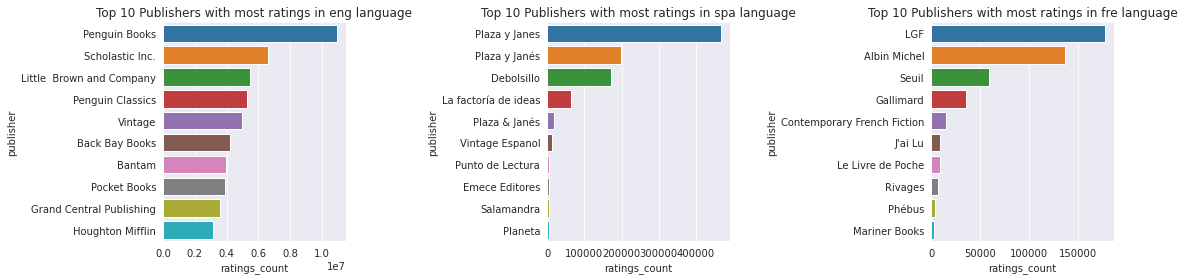

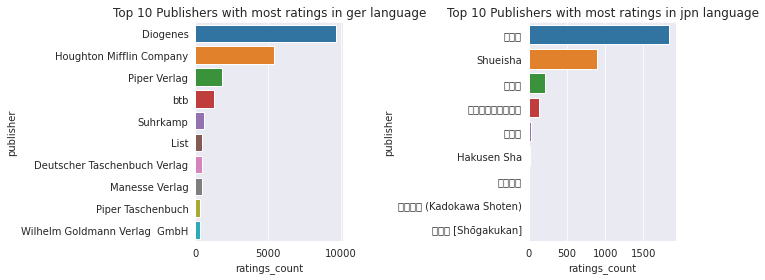

In [19]:
# Create publisher dataframe with ratings_count and its language code
dist_publisher = \
df_new.groupby(['publisher', 'lan_code2'])['ratings_count'].sum().reset_index().\
sort_values(by='ratings_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(16,4))

for i, lan in enumerate(top_5_lan[:3]):
    dt = dist_publisher[dist_publisher['lan_code2'] == lan].sort_values(by='ratings_count', ascending=False).head(10)
    ax = sns.barplot(data=dt, x='ratings_count', y='publisher', ax=axes[i])
    ax.set_title('Top 10 Publishers with most ratings in '+lan+' language')
plt.tight_layout()
    
fig, axes = plt.subplots(1, 2, figsize=(10,4))

for i, lan in enumerate(top_5_lan[3:]):
    dt = dist_publisher[dist_publisher['lan_code2'] == lan].sort_values(by='ratings_count', ascending=False).head(10)
    ax = sns.barplot(data=dt, x='ratings_count', y='publisher', ax=axes[i])
    ax.set_title('Top 10 Publishers with most ratings in '+lan+' language')
plt.tight_layout()

**Average Rating distribution of top 10 authors and publishers**

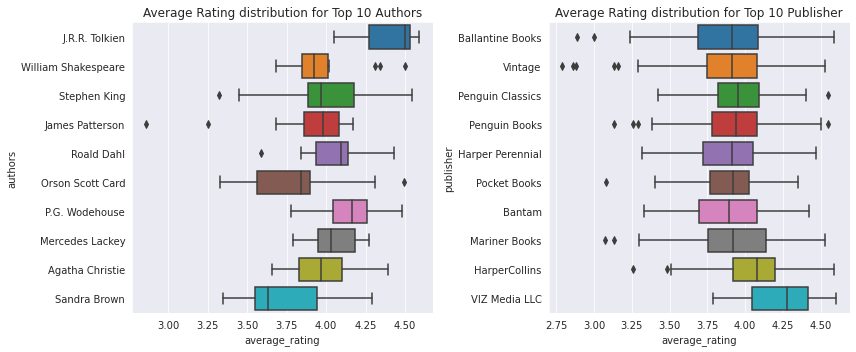

In [20]:
# Average rating for top 10 author with the most books
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Author
top_10_authors = list(dist_authors.sort_values(by='freq', ascending=False).head(10)['author'])
ax = sns.boxplot(data=df_new[df_new.authors.isin(top_10_authors)], x='average_rating', y='authors', ax=axes[0])
ax.set(title='Average Rating distribution for Top 10 Authors')

# Publisher
top_10_publishers = list(df_new.groupby('publisher').count()['title'].reset_index()\
.sort_values(by='title', ascending=False).head(10).publisher)

ax = sns.boxplot(data = df_new[df_new.publisher.isin(top_10_publishers)], x='average_rating', y='publisher', ax=axes[1])
ax.set(title='Average Rating distribution for Top 10 Publisher')

plt.tight_layout()
plt.show()


J.R.R. Tolkien seems to be the author with the best average rating while Sandra Brown is the worst. While in the publisher side, VIZ Media LLC leads the average rating followed by harper collins. 

The rest of the publishers doesn't have a significant median rating difference.

**Num Pages per Rating**

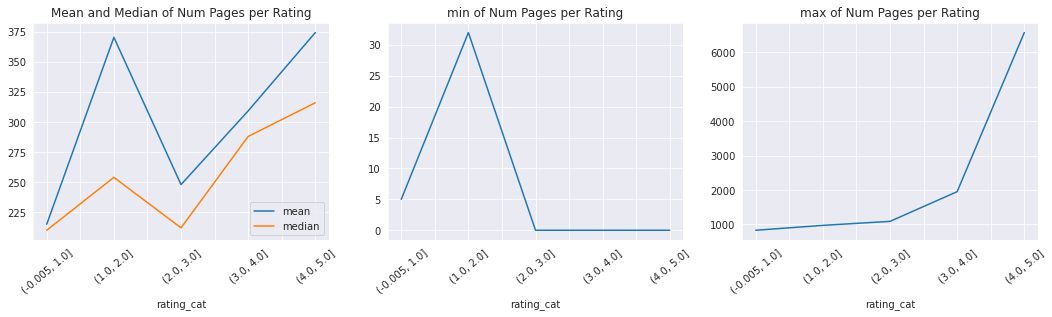

In [21]:
# Average num_pages per average_rating
fig, axes = plt.subplots(1, 3, figsize=(18,4))
page_per_rating = df_new[['num_pages', 'average_rating']]
page_per_rating['rating_cat'] = pd.cut(page_per_rating['average_rating'], 5)
group_page = page_per_rating.groupby('rating_cat').agg([min, np.mean, np.median, max])['num_pages']

stats = [['mean', 'median'], 'min', 'max']

for i, stats in enumerate(stats):
    ax = group_page[stats].plot(ax=axes[i])
    if i == 0:
        ax.set(title='Mean and Median of Num Pages per Rating')
    else:
        ax.set(title=stats+' of Num Pages per Rating')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40)

We can notice something weird, the minimum page of books with ratings above 2 is zero. This is not possible since there won't be a book without pages. Therefore let's count how many books with zero pages in this data.

In [22]:
# Books per bins rating with num_pages equal 0
a = page_per_rating.query('num_pages == 0').groupby(['rating_cat']).count()['num_pages'].reset_index()
zero_pages = sum(a['num_pages'])
display(a)
print("There are", zero_pages, "books with zero num of pages or", round(zero_pages*100/len(df_new), 2), "percent of total books")

,rating_cat,num_pages
0,"(-0.005, 1.0]",0
1,"(1.0, 2.0]",0
2,"(2.0, 3.0]",4
3,"(3.0, 4.0]",39
4,"(4.0, 5.0]",33


There are 76 books with zero num of pages or 0.68 percent of total books


So there are only 76 books or 0.68 percent of total books with zero num of pages in this data. We can remove these data in the preprocessing step. For now on let's continue our exploration on the distribution of num_pages per rating category without data with zero num_pages

In [23]:
# Show table with average num_pages per rating_category without books with zero num_pages
page_per_rating.query('num_pages != 0').groupby('rating_cat').agg([min, np.mean, np.median, max])['num_pages']

,min,mean,median,max
rating_cat,,,,
"(-0.005, 1.0]",5,215.000000,210,830
"(1.0, 2.0]",32,370.428571,254,972
"(2.0, 3.0]",24,263.230769,225,1088
"(3.0, 4.0]",1,311.184918,288,1952
"(4.0, 5.0]",1,377.003403,320,6576


From the table above, we can see that books with the higher rating tends to have more pages. The mean and median value is not much different, this means that the data is not skewed.

But we can still notice weird thing in our data, there is a book with only 1 page and it's a little surprising. We can't really justify the right amount of pages in the book. For now let's just leave it and continue our exploration.

**Text Reviews Count**

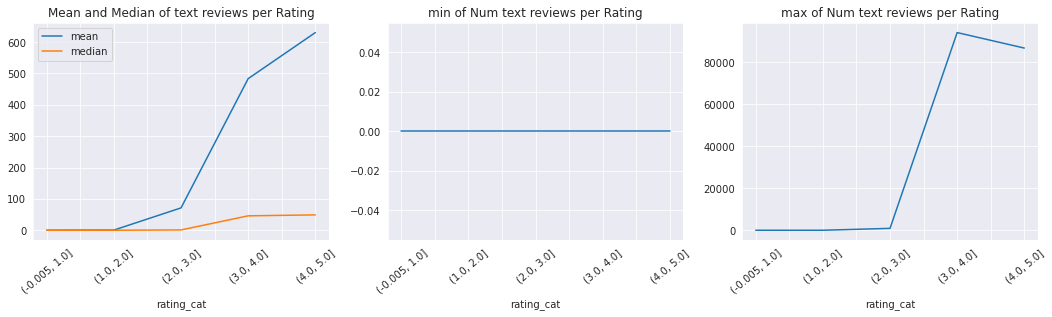

In [24]:
# Average text reviews count per average_rating
fig, axes = plt.subplots(1, 3, figsize=(18,4))
page_per_rating = df_new[['text_reviews_count', 'average_rating']]
page_per_rating['rating_cat'] = pd.cut(page_per_rating['average_rating'], 5) # Create bins of average_rating
group_page = page_per_rating.groupby('rating_cat').agg([min, np.mean, np.median, max])['text_reviews_count']

stats = [['mean', 'median'], 'min', 'max']

for i, stats in enumerate(stats):
    ax = group_page[stats].plot(ax=axes[i])
    if i == 0:
        ax.set(title='Mean and Median of text reviews per Rating')
    else:
        ax.set(title=stats+' of Num text reviews per Rating')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40)

The minimum of text review per book is zero which means no written text review at all.

From the mean and median of text reviews count per rating category we can notice there is a skewed distribution to the right which means that the mean is greater than median value.

# Relationship Between data

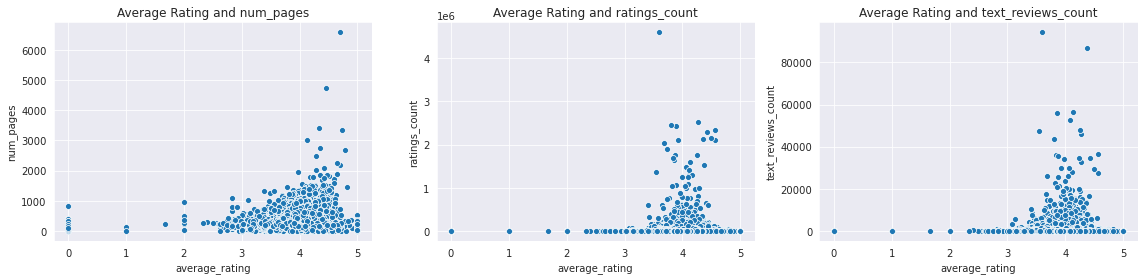

In [25]:
# Scatter plot 
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

stats = ['num_pages', 'ratings_count', 'text_reviews_count']
for i, st in enumerate(stats):
    ax = sns.scatterplot(data=df_new, x="average_rating", y=st, ax = axes[i])
    ax.set_title('Average Rating and '+st)
    
plt.tight_layout()
plt.show()

Seems like there is no correlation between average_rating and num_pages, ratings_count and text_reviews_count

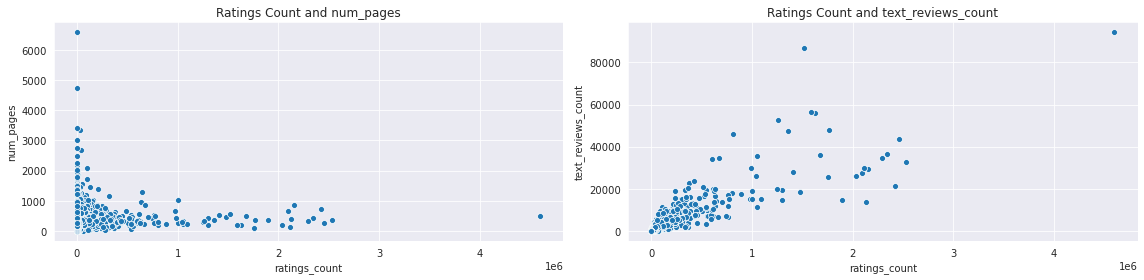

In [26]:
# Scatter plot 
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

stats = ['num_pages', 'text_reviews_count']
for i, st in enumerate(stats):
    ax = sns.scatterplot(data=df_new, x="ratings_count", y=st, ax = axes[i])
    ax.set_title('Ratings Count and '+st)
    
plt.tight_layout()
plt.show()

There is a positive correlation between text_reviews count and ratings_count but it's hard to tell about num_pages and ratings_count.

# Performance of top 3 authors

In [27]:
# Analyze Stephen King
top_3_authors = ['Stephen King', 'J.R.R. Tolkien', 'J.K. Rowling']
df_new['author_ind'] = df_new['authors'].str.split('/')

In [28]:
author_df = df_new[['author_ind', 'title', 'average_rating', 'publish_year', 'ratings_count']]

# Get index for each author
for aut in top_3_authors:
    is_author = author_df['author_ind'].apply(lambda x: True if aut in x else False)
    author_df.loc[list(author_df[is_author].index), 'ind_author'] = aut

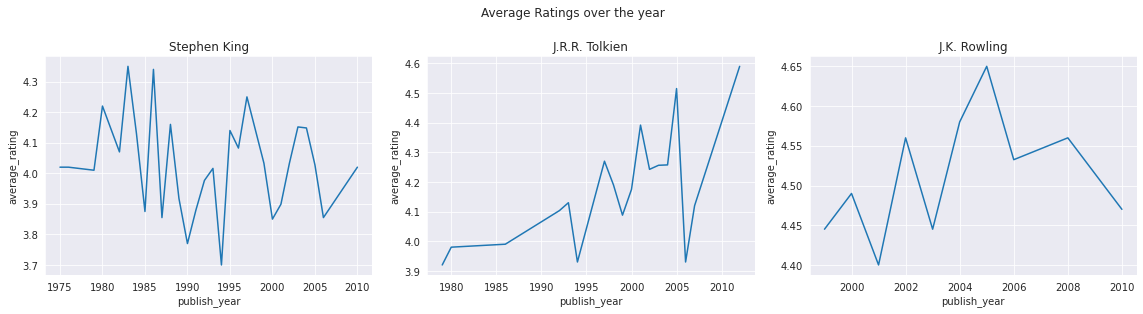

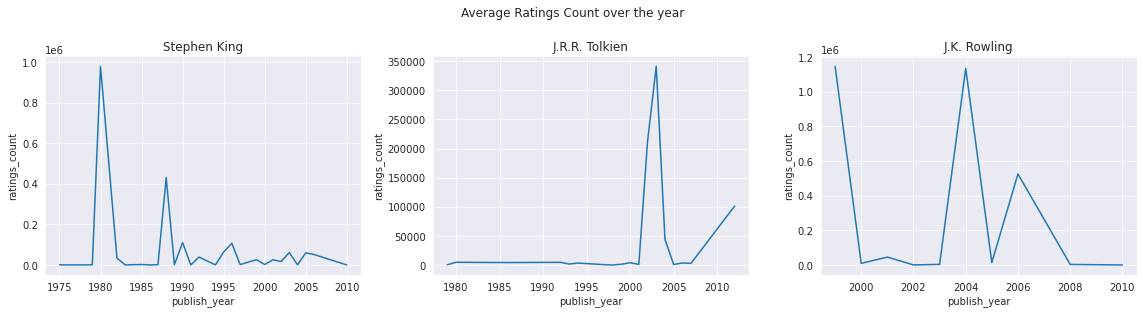

In [29]:
# Subplots average rating over the year for top 3 authors
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(top=0.8)

# Group author and published year to aggregate average rating and ratings count
rating_author = author_df.groupby(['ind_author', 'publish_year']).mean()['average_rating'].reset_index()
rat_count_author = author_df.groupby(['ind_author', 'publish_year']).mean()['ratings_count'].reset_index()

for i, aut in enumerate(top_3_authors):
    ax = sns.lineplot(data=rating_author.query('ind_author == "'+aut+'"'),\
                      x='publish_year', y='average_rating', ax=axes[i])
    ax.set_title(aut)

fig.suptitle('\n'.join(['Average Ratings over the year']), y=1.08)
plt.tight_layout()
plt.show()

# Subplots for average of most ratings count over the year for top 3 authors
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.subplots_adjust(top=0.8)

for i, aut in enumerate(top_3_authors):
    ax = sns.lineplot(data=rat_count_author.query('ind_author == "'+aut+'"'),\
                    x='publish_year', y='ratings_count', ax=axes[i])
    ax.set_title(aut)

fig.suptitle('\n'.join(['Average Ratings Count over the year']), y=1.08)
plt.tight_layout()
plt.show()

From the first row plots, we can see that Stephen King is the most inconsistent writer over the time with the highest rating is 4.3. While ratings for Tolkien's book has improved over the year, Rowling's book ratings also improved but only until 2005. Rowling's books has regressed since 2005.

From the second row plots, Stephen King's books received the most ratings count in the 1980 and hasn't received a lot of ratings after 1996. Tolkien's book received the most ratings count in between 2002-2003 and Rowling as a latest author between them received a lot of ratings in the year 2004 and 2006. Rowling's book seems more suitable for the younger market.

**That's all for the EDA, If you like the kernel, feel free to upvote! I'm open for all feedbacks and improvement. Thank you for reading.**